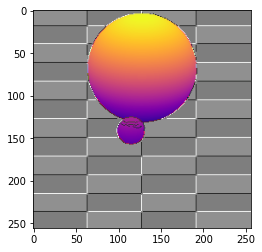

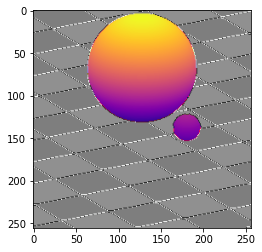

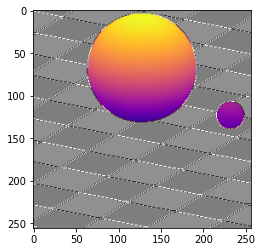

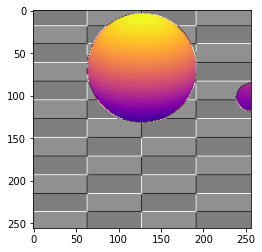

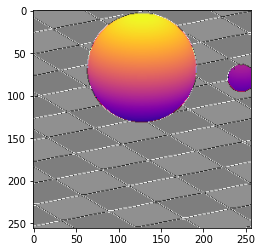

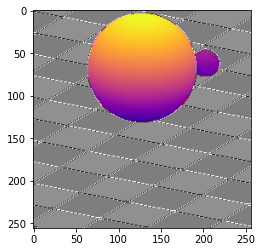

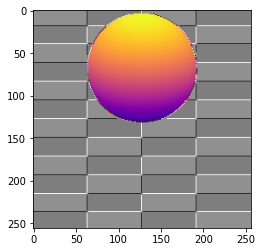

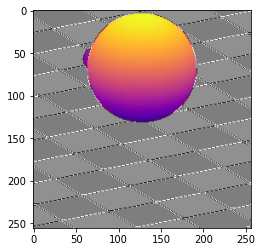

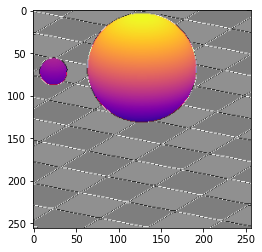

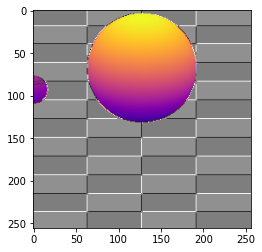

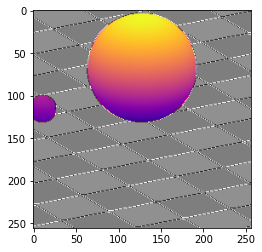

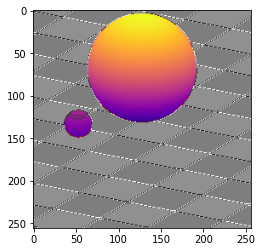

In [14]:
import pycinema
import matplotlib

resolution = (256,256)
phiSamples = (0,360,30)
thetaSamples = (20,20,45)
time = 0.1

planeImages = pycinema.DemoCDB()
planeImages.inputs.Objects.set((1,0,0),False) # Plane Only
planeImages.inputs.Resolution.set(resolution,False)
planeImages.inputs.PhiSamples.set(phiSamples,False)
planeImages.inputs.ThetaSamples.set(thetaSamples,False)
planeImages.inputs.Time.set(time,False)
planeImages.update()

sphereImages = pycinema.DemoCDB()
sphereImages.inputs.Objects.set((0,1,1),False) # Big and Small Sphere
sphereImages.inputs.Resolution.set(resolution,False)
sphereImages.inputs.PhiSamples.set(phiSamples,False)
sphereImages.inputs.ThetaSamples.set(thetaSamples,False)
sphereImages.inputs.Time.set(time,False)
sphereImages.update()

spheresColordByY = pycinema.ColorMapping()
spheresColordByY.inputs.Channel.set( "Y", False )
spheresColordByY.inputs.Map.set( "plasma", False )
spheresColordByY.inputs.Range.set( (0,2), False )
spheresColordByY.inputs.Images.set( sphereImages.outputs.Images )

depthCompositing = pycinema.DepthCompositing()
depthCompositing.inputs.ImagesA.set(planeImages.outputs.Images, False )
depthCompositing.inputs.ImagesB.set(spheresColordByY.outputs.Images, False )
depthCompositing.update()

imageCanny = pycinema.ImageCanny()
imageCanny.inputs.Images.set(depthCompositing.outputs.Images, False)
imageCanny.inputs.Thresholds.set([0,70],False)
imageCanny.update()

maskCompositing = pycinema.MaskCompositing()
maskCompositing.inputs.ImagesA.set(depthCompositing.outputs.Images, False )
maskCompositing.inputs.ImagesB.set((0,255,0,1), False )
maskCompositing.inputs.Masks.set(imageCanny.outputs.Images, False )
maskCompositing.inputs.MaskChannel.set('Canny', False )
maskCompositing.update()

ssao = pycinema.ShaderSSAO()
ssao.inputs.Radius.set( 0.1, False )
ssao.inputs.Samples.set( 256, False )
ssao.inputs.Diff.set( 0.5, False )
ssao.inputs.Images.set( maskCompositing.outputs.Images )

anno = pycinema.Annotation()
anno.inputs.Color.set('white')
anno.inputs.Spacing.set(10)
anno.inputs.Size.set(15)
anno.inputs.Images.set(ssao.outputs.Images)

from matplotlib import pyplot
images = maskCompositing.outputs.Images.get();

for i in range(len(images)):   
    image = images[i]
    matplotlib.pyplot.imshow(image.channel['RGBA'])
    matplotlib.pyplot.show()
